In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from func4 import *

# Advection Equation

This code is to initialize a function that uses the advection equation to show the motion of a particle through a "hat" flow field. These are the parameters:

* `D` - particle diameter

In [6]:
def advection_multiple_particles(D, particles):
    ##### INITIALIZATION #################################
    c     = 10 # m/s                          # initial gas velocity at spike
    e     = 1 # m/s                           # initial gas velocity elsewhere
    N     = 100                               # number of plot points   
    Niter = 100                               # number of iterations for time
    x     = np.linspace(0,100,N)              #
    dx    = x[1]-x[0]                         # change in x
    dt    = 0.5*dx/c                          # change in t
    rho_g = 1.6 # kg/m^3                      # gas density
    dia_p = D                                 # particle diameter
    A     = np.pi*0.25*dia_p**2               # particle projected area
    rho_p = 2500 # kg/m^3                     # particle density
    M     = rho_p * 1/6 * dia_p**3 * np.pi    # particle mass
    mu    = 2e-5 # kg/ms                      # dynamic viscosity
    left  = 50.0                              # initial position of leftmost particle
    right = 70.0                              # initial position of rightmost particle

    # ARRAYS
    Fd_arr = []
    Fd_arr.append(0.0)
    up_arr = []
    up_arr.append(0.0)
    xp_arr = []
    xp_arr.append(50.0)
    ug_arr = []
    ug_arr.append(e)
    t_arr = []
    t_arr.append(0)
    
    pos_arr = []
    
    # BIG ARRAYS
    Fd_big = []
    up_big = []
    xp_big = []
    ug_big = []
    t_big = []
    
    for l in range(particles):
        Fd_big.append([0] * Niter)
        up_big.append([0] * Niter)
        xp_big.append([0] * Niter)
        ug_big.append([0] * Niter)
        t_big.append([0] * Niter)
    ######################################################

    for k in range(particles):
        pos = left + k * (right - left)/(particles - 1)
        pos_arr.append(pos)
        
        Fd_arr = []
        Fd_arr.append(0.0)
        up_arr = []
        up_arr.append(0.0)
        xp_arr = []
        xp_arr.append(pos)
        ug_arr = []
        ug_arr.append(e)
        t_arr = []
        t_arr.append(0)
    
        u = np.ones(N)
        u[0] = e
        u[10:20] = 5

        for j in range(Niter):
            t_arr.append(t_arr[-1] + dt)

            for i in range(N-1):
                uL = u[i]
                uR = u[i+1]
                u[i+1] = (uL*c*dt + uR*(dx - c*dt))/dx

            u[0] = u[N-1]

            ############# PARTICLE SOLVER #############################
            ug_temp = kernel2(xp_arr[-1] , 'p' , u , dx)
            ug_arr.append(ug_temp)

            Re = rho_g * abs(ug_arr[-1] - up_arr[-1]) * dia_p / mu # Reynolds number

            # Cd = Cd_Sternin(0) 
            Cd = Cd_Loth(Re, ug_temp, up_arr[-1], 300, 300, dia_p, rho_g) # Tg = 300 K, Tp = 300 K
            Fd_arr.append(Cd * rho_g * A * abs(ug_temp - up_arr[-1]) * (ug_temp - up_arr[-1]) / 2)

            up_arr.append(up_arr[-1] + Fd_arr[-1] * dt / M)

            xp_arr.append(xp_arr[-1] + up_arr[-1] * dt)
            ###########################################################
        
        Fd_big[k] = Fd_arr
        up_big[k] = up_arr
        xp_big[k] = xp_arr
        ug_big[k] = ug_arr
        t_big[k] = t_arr
    
    return t_big, up_big, ug_big, Fd_big, xp_big, pos_arr

# Plots

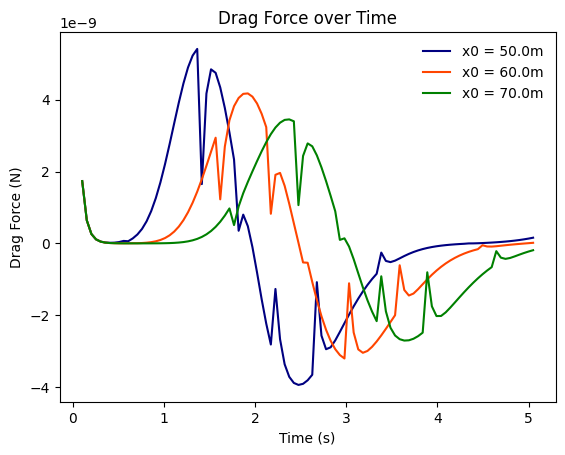

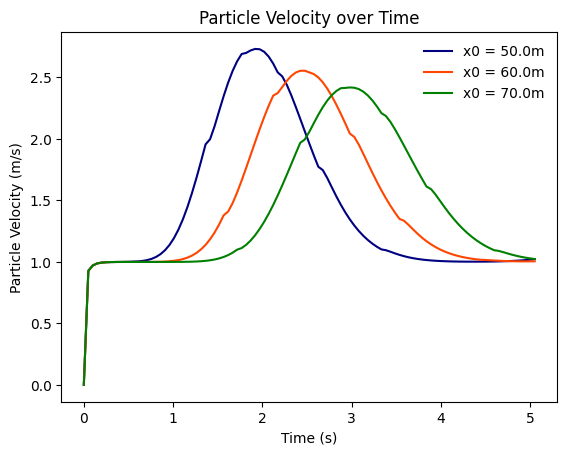

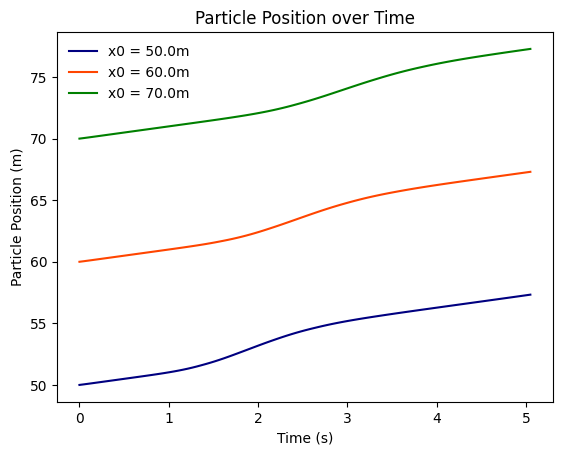

In [17]:
dia_p1 = 115e-6 # m

particles = 3

t_big, up_big, ug_big, Fd_big, xp_big, pos_arr = advection_multiple_particles(dia_p1, particles)

for i in range(particles):
    if (i % 5 == 0):
        plt.plot(t_big[i][2:], Fd_big[i][2:], color = 'navy', label = f'x0 = {pos_arr[i]}m')
    if (i % 5 == 1):
        plt.plot(t_big[i][2:], Fd_big[i][2:], color = 'orangered', label = f'x0 = {pos_arr[i]}m')
    if (i % 5 == 2):
        plt.plot(t_big[i][2:], Fd_big[i][2:], color = 'green', label = f'x0 = {pos_arr[i]}m')
    if (i % 5 == 3):
        plt.plot(t_big[i][2:], Fd_big[i][2:], color = 'm', label = f'x0 = {pos_arr[i]}m')
    if (i % 5 == 4):
        plt.plot(t_big[i][2:], Fd_big[i][2:], color = 'y', label = f'x0 = {pos_arr[i]}m')
plt.title('Drag Force over Time')
plt.ylabel('Drag Force (N)')
plt.xlabel('Time (s)')
plt.legend(frameon=False)
plt.show()

for i in range(particles):
    if (i % 5 == 0):
        plt.plot(t_big[i], up_big[i], color = 'navy', label = f'x0 = {pos_arr[i]}m')
    if (i % 5 == 1):
        plt.plot(t_big[i], up_big[i], color = 'orangered', label = f'x0 = {pos_arr[i]}m')
    if (i % 5 == 2):
        plt.plot(t_big[i], up_big[i], color = 'green', label = f'x0 = {pos_arr[i]}m')
    if (i % 5 == 3):
        plt.plot(t_big[i], up_big[i], color = 'm', label = f'x0 = {pos_arr[i]}m')
    if (i % 5 == 4):
        plt.plot(t_big[i], up_big[i], color = 'y', label = f'x0 = {pos_arr[i]}m')
plt.title('Particle Velocity over Time')
plt.ylabel('Particle Velocity (m/s)')
plt.xlabel('Time (s)')
plt.legend(frameon=False)
plt.show()

for i in range(particles):
    if (i % 5 == 0):
        plt.plot(t_big[i], xp_big[i], color = 'navy', label = f'x0 = {pos_arr[i]}m')
    if (i % 5 == 1):
        plt.plot(t_big[i], xp_big[i], color = 'orangered', label = f'x0 = {pos_arr[i]}m')
    if (i % 5 == 2):
        plt.plot(t_big[i], xp_big[i], color = 'green', label = f'x0 = {pos_arr[i]}m')
    if (i % 5 == 3):
        plt.plot(t_big[i], xp_big[i], color = 'm', label = f'x0 = {pos_arr[i]}m')
    if (i % 5 == 4):
        plt.plot(t_big[i], xp_big[i], color = 'y', label = f'x0 = {pos_arr[i]}m')
plt.title('Particle Position over Time')
plt.ylabel('Particle Position (m)')
plt.xlabel('Time (s)')
plt.legend(frameon=False)
plt.show()